## Practical aspects of machine learning

### Training / Validation / Test sets

- ML is a highly iterative process: (idea -> code -> experiment -> idea)
    - We need to tune parameters: number of layers, number of hidden units, learning rates, activation functions

- data will be split into three parts:
    - training set (the largest set)
    - validation / development / dev set (try them on the good models you have trained)
    - testing set

- workflow:
    - keep on training algorithm on training set, see which model performs the best on validation set.
    - After having done this long enough and have a final model to evaluate, evaluate it on test set. 

- Make sure the validation and test sets are coming from the same distribution
    - For example if training pictures (cat) is from the web and the validation/test pictures are from users cell phone they will mismatch. It is better to make sure that validation and test set are from the same distribution.

- Typical ratio of three dataset:
    - small data (<1,000,000): 60% train, 20% validation, 20% test
    - big data (>1,000,000): 98% train, 1% validation (10,000), 1% test (10,000) or smaller

### Bias / Variance

- Bias/Variance techniques are easy to learn, but difficult to master

- Here the explanation of bias/variance:
    - If your model is underfitting, it has a "high bias”
    - If your model is overfitting then it has a "high variance”
    - Your model will be right if you balance the bias/variance

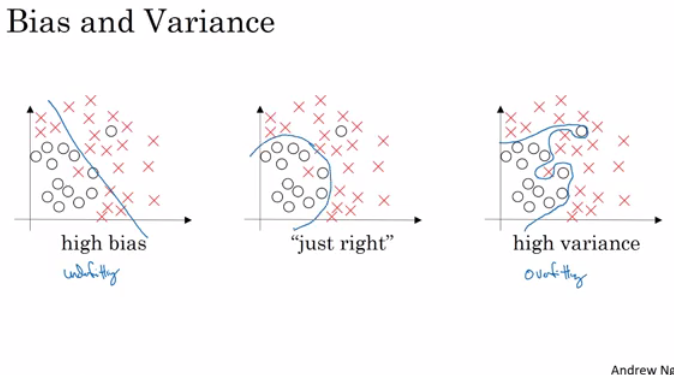

- Another idea to get the bias/variance if you don't have a 2D plotting mechanism:

    - High variance (overfitting) for example:
        - Training error: 1%
        - Validation error: 11%

    - high Bias (underfitting) for example:
        - Training error: 15%
        - Validation error: 14%

    - high Bias (underfitting) && High variance (overfitting) for example:
        - Training error: 15%
        - Validation error: 30%

    - Best:
        - Training error: 0.5%
        - Validation error: 1%

### Basic recipe for machine learning

- If your algorithm has a high bias:
    - Try to make your NN bigger (number of hidden neurons, number of layers)
    - Try a different model that is suitable for your data
    - Try to train it longer (number of epochs)
    - Different (advanced) optimization algorithms

- If your algorithm has a high variance:
    - Try to add more data
    - Try a different model that is suitable for your data
    - Try regularization

### Regularization
- Adding regularization to NN will help it reduce variance (overfitting)
    - L1 regularization: add L1 penalty term in loss function
    - L2 regularization: add L2 penalty term in loss function, also called weight decay

- The normal cost function that we want to minimize is:
$$
J(W, b) = \frac{1}{m} \sum_i L(y(i),y'(i))
$$
The L2 regularization version:
$$
J(W,b) = \frac{1}{m} \sum_i L(y(i),y'(i)) + \frac{\lambda}{m} (|W|^2 + |b|^2)
$$

- To do back propagation:
    - The old way:
    $dw =$ (from back propagation)
    - The new way: $dw =$ (from back propagation) $+ \frac{\lambda}{m} w$
    - plugging it in weight update step:
    $$
    \begin{aligned}
        w &= w - \textrm{learning_rate} * dw \\
	      &= w - \textrm{learning_rate} * (\textrm{(from back propagation)} + \frac{\lambda}{m} w) \\
	      &= w - (\textrm{learning_rate} * \frac{\lambda}{m}) * w - \textrm{learning_rate} * \textrm{(from back propagation)} 	\\
          &= (1 - (\textrm{learning_rate}*\frac{\lambda}{m})) * w - \textrm{learning_rate} * \textrm{(from back propagation)}
    \end{aligned}
    $$
    
    - The new term $(1 - (\textrm{learning_rate}*\frac{\lambda}{m})) * w$ causes the weight to decay in proportion to its size.

- Why regularization reduces overfitting
    - Intuition: weights will be smaller (close to zero) - use the linear part of the tanh activation function, so we will go from nonlinear activation to roughly linear which would make the NN a roughly linear classifier    

### Dropout Regularization

- The dropout regularization eliminates some neurons/weights on each iteration based on a probability，thus train a much smaller neural network
- Dropout probability can be different for different layers
```
# below is sample code
import numpy as np

keep_prob = 0.8   # 0 <= keep_prob <= 1
l = 3  # this code is only for layer 3

# the generated number that are less than 0.8 will be dropped. 80% stay, 20% dropped
d3 = np.random.rand(a[l].shape[0], a[l].shape[1]) < keep_prob
a3 = np.multiply(a3,d3)   # keep only the values in d3

# increase a3 to not reduce the expected value of output
# (ensures that the expected value of a3 remains the same) - to solve the scaling problem
a3 = a3 / keep_prob
```
- widely used in computer vision, because image as an input is very high dimension, almost never have enough data, so it is easy to get overfitting

- Understanding dropout
    - reason1: train a much smaller neural network should have a regularizing effect
    - reason2: each node cannot rely on any one feature, so have to spread out weight, this will tend to have an effect of shrinking the squared norm of the weights

### Other regularization method
- data augmentation: flip image horizontally, rotation
- early stopping:
    - idea: plot training error (should decrease) and validation error (should first decrease and then increase)
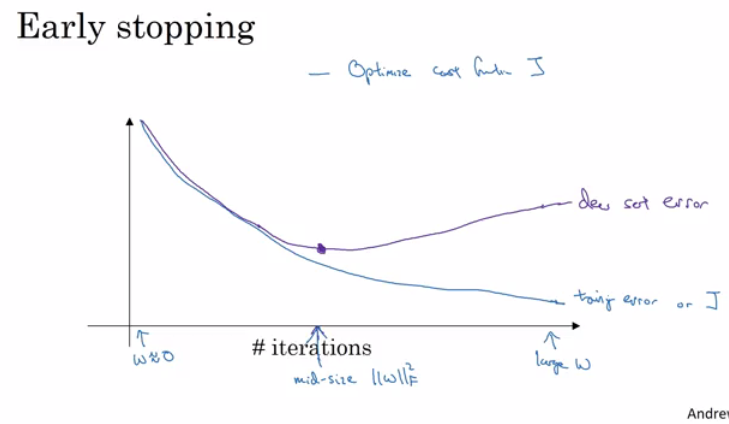

### Normalizing inputs
- normalize data (set mean to be 0 and variance to be 1), speed up the training process

- Normalization are going on these steps:
    - Get the mean of the training set: mean = (1/m) * sum(x(i))
    - Subtract the mean from each input: X = X - mean
    - Get the variance of the training set: variance = (1/m) * sum(x(i)^2)
    - Normalize the variance. X = X/variance

- These steps should be applied to training, dev, and testing sets (but using mean and variance of the train set)

- Why normalize:
    - If we don't normalize the inputs our cost function will be deep and its shape will be inconsistent (elongated) then optimizing it will take a long time.
    - But if we normalize it the opposite will occur. The shape of the cost function will be consistent (look more symmetric like circle in 2D example) and we can use a larger learning rate alpha - the optimization will be faster.

### Vanishing / Exploding gradients

- The Vanishing / Exploding gradients occurs when gradients become very small or very big.

- To understand the problem, suppose that we have a deep neural network with number of layers L, and all the activation functions are linear and each bias=0:

    - Y = W[L]W[L-1].....W[2]W[1]X
    - W[I] = diag(0.9, 0.9, …, 0.9), Y = diag(0.9^L, 0.9^L, …, 0.9^L)X
    - L = MSE(Y, Y’)

- If only consider linear activation function without bias, then fully connected neural network is just multiplication of matrices and multiplication many times will eventually cause vanishing or blow up

### Weight initialization for Deep Networks Vanishing / Exploding gradients

- A partial solution to the Vanishing / Exploding gradients in NN is better or more careful choice of the random initialization of weights

- Bad choice: Initialize all the weights to be a constant (in particular zero) and all the bias to be zero, this will make nodes in every layer symmetrically throughout the training and restrict the expression of neural network

- Intuition: 

- In a single neuron: $z = w1*x1 + w2*x2 + ... + wn*xn$. So if n is large we want W's to be smaller to not explode the cost. It turns out that we need the variance which equals 1/n_x to be the range of W’s

- So lets say when we initialize W's like this (better to use with tanh activation): np.random.rand(shape) * np.sqrt(1/n[l-1])

- This is one of the best way of partially solution to Vanishing / Exploding gradients (ReLU + Weight Initialization with variance) which will help gradients not to vanish/explode too quickly

- Other initializations: Xavier initialization and He initialization, idea is to make sure variance of input and output in each layer is close to 1